In [2]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-03-11 15:35:08--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2025-03-11 15:35:08 (18.9 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [2]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [3]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [4]:
# let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [5]:
# all unique charachter in a text is the vocab of a text
# set gives unique char, sorted list of unique char
# len of that is vocab_size
chars= sorted(list(set(text)))
vocab_size= len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [6]:

# simple encoder/decoder logic
# create a mapping from characters to integers
# iterate over all the char and map it to integers
stoi = { ch:i for i,ch in enumerate(chars) }
# iterate over all the  integer and map it to char
itos = { i:ch for i,ch in enumerate(chars) }
# function that takes a string and makes it to integer
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
# function that takes a string and makes it to character
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there")) # encoding a text we recieve a lsit of integers that represents the string
print(decode(encode("hii there")))# decoder: take a list of integers, output a string

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [9]:
!python -m pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.3 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 KB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 KB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.1/146.1 KB 29.3 MB/s eta 0:00:00
You should consider upgrading via the '/home/rit/neural_net_karpathy/.venv/bin/python -m pip install --upgrade pip' command.


In [7]:
# openai uses tiktoken to do this 
# read from here https://github.com/openai/tiktoken
# example usage
import tiktoken
enc= tiktoken.get_encoding('gpt2')
# tiktoken has 50257 tokens between 0 to 50257
enc.n_vocab

50257

In [8]:
enc.encode("hii there")

[71, 4178, 612]

In [9]:
enc.decode([71, 4178, 612])

'hii there'

In [10]:
# here we are using character level tokenizer as mentioned above
# it encodes and decodes each charachter so we get long sequenc of integers


In [11]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [12]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [13]:
# we genrally dont give entire data to train the transformer we use chunks from the data
# the max chunk length is reffered here as block_size
block_size= 8
# first 9 charachters in training set
# we predict at every charachter level
# eg in context of 18 --> 47 comes next , in context of 18,47 --> 57 comes next and so on
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [14]:
#explanation of next charachter or target to be predicted
x = train_data[:block_size] # inputs, 1st block size char
y = train_data[1:block_size+1] # next block size char as target
for t in range(block_size):
    context = x[:t+1] # all the char in x upto t including t
    target = y[t] # always the target t in list of targets y
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [ ]:
# while training we will have many batches of multiple chuncks or blocks of text
# so we can keep all gpu utilized
# so we use batch_size as well 
# seed will allow us to randomly locate the chunks from the text
# we can randomize the seed but for now we make it maual so that we see same no 
# for vedio ref
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    # if split is train the we see the train data or val data
    data = train_data if split == 'train' else val_data
    #ix is 4 numbers randomly generated as batch size is 4 ,ix is bw 0 and len(data)- block_size
    ix = torch.randint(len(data) - block_size, (batch_size,))
    # firt block_size chr starting at i <-- geting chunks for blocksize
    # x is 4*8 tensor  and each row of x is chunk of training set
    x = torch.stack([data[i:i+block_size] for i in ix])
    # offset by 1 of x
    # each associated targets of x is stored in y
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")


inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

In [16]:
print(xb) # our input to the transformer

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


#### here if we see the crossentropy of pytorch , we know that inputs are accepted as (minibatch,C) which is 2d thus 
#### we reshape the logits from b,t,c to 2d where min batch is b*t and c is channels (vocab_size)
#### check https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
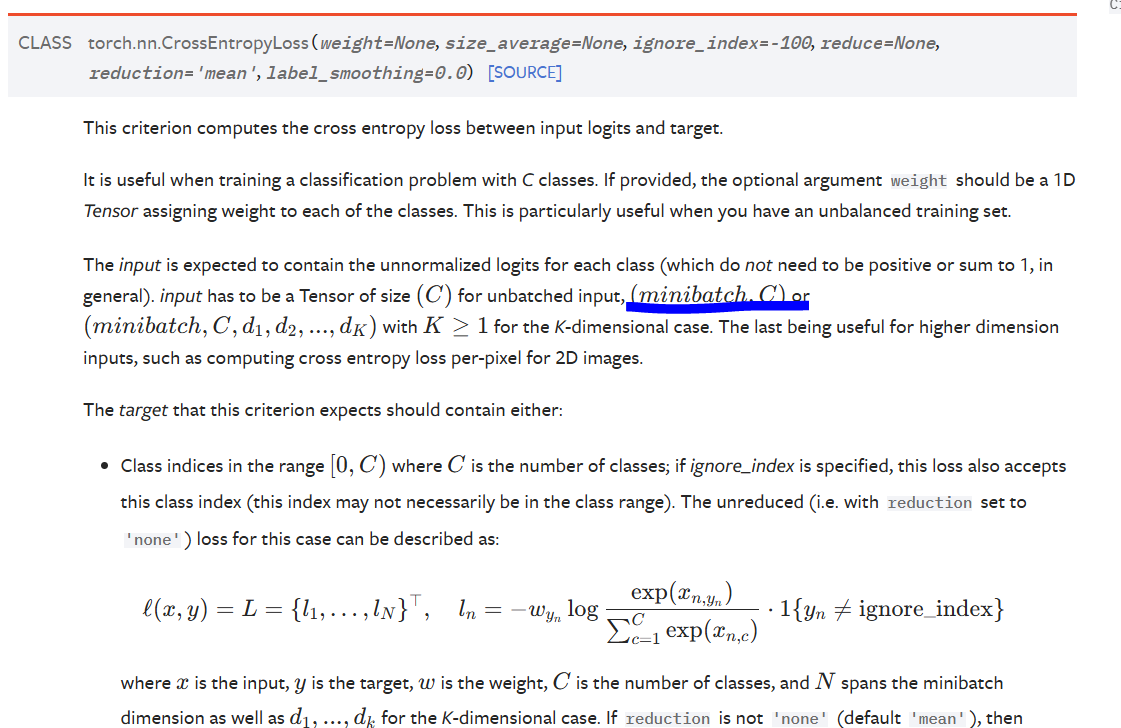

In [23]:
# simple neural network bigram language model
# bigram language model is done in makemore lectures
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        #every single integer in nput will refer to token embedding table craeted in __init__
        #and i will pluck ot a row of that embedding table coresponding to the index
        # tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        # [44, 53, 56,  1, 58, 46, 39, 58],
        # [52, 58,  1, 58, 46, 39, 58,  1],
        # [25, 17, 27, 10,  0, 21,  1, 54]])
        # 24 will pluck 24th row of embedding table so on
        # pytorch arranges this into batch, time, channel (vocab_size)--> 4,8,65
        # this (b,t,c) is logits the score of next char in the sequence
        logits = self.token_embedding_table(idx) # (B,T,C)

        # if their is no target we dont have loss as loss is b/w target and predicted
        # target might be none for 1st iteration by default
        if targets is None:
            loss = None
        else:
            # check above why this re arrange ments is done for logits
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            # same is done for targets
            targets = targets.view(B*T)
            # negetive likelihood loss or cross entropy of how well we predict the nxt char 
            # using logits and targets
            loss = F.cross_entropy(logits, targets)

        return logits, loss
    
    # the job of generate is to take b, t and generate (b,t+1), (b,t+2) .... so on
    # it will do that untill max new tokens
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions from logits
            logits, loss = self(idx)
            # focus only on the last time step
            # we focus on list element in time demension so that we can predict what comes next
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            # idx_next b, 1 as in each batch dimension their is single prediction 
            # of what comes next
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)
# 0 is new line char so first we feed 0 as index and ask to 
# generate the rest upto max tokens, 
# as generate function returns batches of idx 
# so we get the 1st idx as 0 position  and convert it 
# into a list as we have seen before decode function takes a list of integers and gives 
# next predicted characters
idx = torch.zeros((1, 1), dtype=torch.long)
print(decode(m.generate(idx, max_new_tokens=100)[0].tolist()))



torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


In [ ]:
# now some garbage is being generated as model is not trained
# so we need to train the model

# create a PyTorch optimizer
# optimizer-- takes the gradients and updates the parameters using gradients 
# as done in leacture 1 about gradients in micrograd lecture
# m is our model onto which optimizer is applied
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [31]:
# Training
batch_size = 32 # increase this for better utilization of gpu
for steps in range(15000): # increase number of steps for good results...

    # sample a batch of data
    # as we defined get_batch before to get batch of train data
    xb, yb = get_batch('train')

    # evaluate the loss and increase steps untill loss is less 10000
    # m is our model as stored above
    logits, loss = m(xb, yb)
    # updates gradients starting at 0 gard
    optimizer.zero_grad(set_to_none=True)
    # backpropogation
    loss.backward()
    # again update gradients do this entirely for 10000
    optimizer.step()

print(loss.item())

2.314162254333496


In [33]:
idx = torch.zeros((1, 1), dtype=torch.long)
print(decode(m.generate(idx, max_new_tokens=500)[0].tolist()))


K:
DO: d; mpe ourmnnourt w CHe the ak hene ck hinatimoue iewbed brewak agre s yo a frpesetinor thtisteankeds w lathencefe h send amy'domerol.
Sermer:
Seads hed here owan wh, ig, t d Cayo by ot ILLI int, wel fresest w ff y s corsouroulour, A cthontramy-qur canispo pamofouco Heaves s; te wave, t, mais ous y 't at
Pef chou, withy t:
OLand, int,

I'redsth
Alala orer k d in foulenouthorsouth, me,
BR  t, s.

EN:
MENRETis mur bellek' tincl, k, or thishorindis's Men!
ERY omol ances ouninor lee othr icre


In [ ]:
# now in the above bigram model the tokens do not know the context just knows itself n next prediction so its perpormance is poor
# now we use transformers so that context is well understood for better performance
# now will first take this code into a .py file to make it more exceutble an add few more details their